## Final Project Submission

Please fill out:
* Student name: Margaret Boland
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Introduction

The housing market is an integral indicator of both local and national economic performance. As of late, the US housing market has exploded since the onset of the COVID-19 global pandemic. Home sales reach a record 15 year peak in 2021 with more than 6 million homes sold, according to the National Association of Realtors (NAR). Likewise, housing prices have skyrocketed. In Q3 2021, the NAR reported that home sale prices were up a staggering 20% year-over-year. Sales are also happening at an incredibly quick rate. The average time from listing to accepted offer was 22 days in 2021, according to Ellie Mae Origination Insight Report. In some markets this time was reduced further. The Seattle area saw an average days on the market of just 5 days, according to Redfin. 

A heated housing market makes pricing decisions even more important for multiple reasons. First, the shortened time on market means that there is not much time to adjust prices. If a realtor overprices a property, it may sit on the market for longer leading buyers to overlook the property. Longer time on the market increases costs for realtors and sellers alike. On the otherhand, underpriced houses (not usually an issue in a heated housing market but none the less a concernt) run the risk of damaging realtors reputation — a large concern for a referral based business. 

Statistical inferential analysis can help alleviate pricing risks and serve as a model for pricing future listings. To create a stastical inferential pricing model, we examined [data]("./data/kc_house_data.csv") from King County House Sales dataset. The data covers over 20,000 house sales from 2014-2015 in Kings County, Washington (Greater Seattle area) and includes 20 characteristics of these observations. From the dataset we worked to create a pricing model that would best capture how these various characteristics explained the variation in house sale price. The "Best Fit" inferential model that we determined seves as a past template to help realtors determine pricing strategy for home sales. 

## Opening Dataset and Pulling out Descriptive Features

In [442]:
#Importing relevant packages to read the dataset, run descriptive statistics, and start to visualize patterns. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [443]:
#Open data file and save it as housing_df. Column names found in "./data/column_names.md"
housing_df = pd.read_csv("./data/kc_house_data.csv")

In [572]:
#Check out the first 10 rows of the data to see that everything was properly loaded. 
housing_df.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,Fair,Good,Poor,Very Good
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,0.0,0.0,0.0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,0.0,0.0,0.0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,0.0,0.0,0.0
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,0.0,0.0,0.0
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,0.0,0.0,0.0
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,0.0,0.0,0.0


In [445]:
housing_df.shape

(21597, 21)

.shape() shows us we have 21,597 observations (house sales) and 21 columns (information about the houses)

In [446]:
#Examine columns & column information
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The mean sale price of houses in our dataset is $540,296 with a standard deviation of 367,368. The rance of sale price is quite substantial - $78,000 to $7,700,000 

In [447]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We notice from the .info() that there are 21,596 data observations (entries - 1 because of headers). There seems to be significant data missing from waterfront and yr_renovated. There are some observations missing from "view. 

Our variable of interest is Price - which describes the sale price for each observation. We next will dig deeper into the sale price. 

In [448]:
price_mean = housing_df["price"].mean()
price_mean

540296.5735055795

In [449]:
price_median = housing_df["price"].median()
price_median

450000.0

In [450]:
price_min, price_max = housing_df["price"].min(), housing_df["price"].max()
price_min, price_max

(78000.0, 7700000.0)

Our housing data prices (without any cleaning has the following qualities) 

Mean: $540,296.57
Median: $450,000
Min: $78,000
Max: $7,700,000

From this information we can tell that since the median is to the left of the mean, that there is a long right tail. Suggesting high outliers on the upper bounds of our price data. To visualize this we can run a histogram of price. 

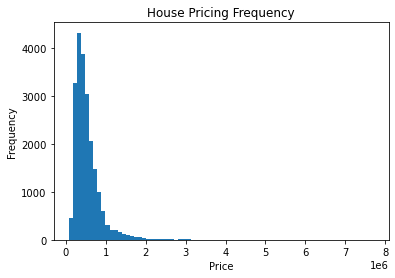

In [451]:
plt.hist(housing_df["price"], bins = 75)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("House Pricing Frequency");

You can see from the histogram that the price distribution has a long right tail (which we assumed from the median falling below the mean). It suggests we have outliers in the higher levels of our sale price varible. It also suggests that our target variable, price, may not follow a Normal Distribution and thus violates the normal distribution assumption needed to perform OLS regression analysis. To fix this problem, we may need to log our target variable. 

## Cleaning the Data: Dropping Irrelevant/Unreliable Data

Some of the variables that the data set includes, are not as relevant for the determination for realtors on how to price homes (lat, long, sqft_living15, sqft_lot15). Other indicators are either missing data or need substantial transformations to be usable and thus are dropped in our model (data, view, sqft_above, sqft_basement, yr_renovated, zipcode). 

In [452]:
unneeded_vars = ["date", "view", "sqft_above", "sqft_basement", "yr_renovated", "zipcode",  "lat", "long",
                           "sqft_living15", "sqft_lot15"]  

housing_dropped_var_df = housing_df.drop(unneeded_vars, axis =1)
housing_dropped_var_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [453]:
#Replace housing_df main data table with the new housing_dropped_var_df for syntax purposes. 
housing_df = housing_dropped_var_df
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [454]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


## Dealing with Missing Values in Waterfront Variable

From the .info() we see that waterfront is missing over 2000 values. Since we expect that waterfront property will explain the variation of the sale price of a house in an eventual regression, we will look into how we should deal with the missing values. There are three options 1)drop the column 2) drop the missing values 3) impute values based on mean or other determinations. 

In [455]:
#Calculate how many values are missing in the waterfront variable.
housing_df["waterfront"].isna().sum()

2376

In [456]:
#Calculate what percentage of the data set is missing in the waterfront
2376/len(housing_df["waterfront"])

0.11001527989998611

In [457]:
housing_df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

From our analysis, we see that 11% of our Waterfront variable are missing values. To determine if the variable is important to our determination of price we will find the mean sale value of the 146 houses that are on the waterfront to see if it is above the mean. 
-If the mean and median sale price of housing on the waterfront is statistically significant different then we must keep the column. 
-If the mean and median sale price of housing on the waterfront is not statistically significant different from houses not on the waterfront then we can drop the column and explore other distinctions of houses. 

In [458]:
waterfront_yes_mean = housing_df["price"][housing_df["waterfront"] == "YES"].mean()

In [459]:
housing_df["price"][housing_df["waterfront"]  == "YES"].min()

285000.0

In [460]:
housing_df["price"][housing_df["waterfront"]  == "YES"].max()

7060000.0

In [461]:
waterfront_yes_median = housing_df["price"][housing_df["waterfront"]  == "YES"].median()

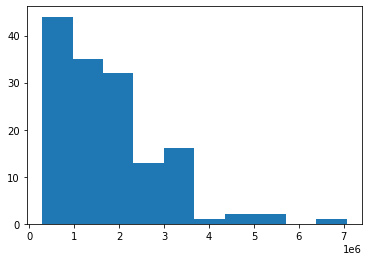

In [462]:
plt.hist(housing_df["price"][housing_df["waterfront"]  == "YES"]); 

In [463]:
waterfront_no_median = housing_df["price"][housing_df["waterfront"]  == "NO"].median()

In [464]:
waterfront_no_mean = housing_df["price"][housing_df["waterfront"]  == "NO"].mean()

In [465]:
housing_df["price"][housing_df["waterfront"]  == "NO"].min()

78000.0

In [466]:
housing_df["price"][housing_df["waterfront"]  == "NO"].max()

7700000.0

In [467]:
# run the ttest of the mean for houses on the waterfront against houses not on the waterfront. 
t_value,p_value=stats.ttest_ind(housing_df["price"][housing_df["waterfront"]  == "NO"], housing_df["price"][housing_df["waterfront"]  == "YES"])
t_value, p_value

(-39.85499435906471, 0.0)

Because the mean for houses on the waterfront is statistically significant difference from the mean sale price of houses not on the waterfront we determine that it's important to not drop this variable. 

However, we still have 2376 missing data for this variable. Before we drop this missing data, we should see the characteristics of the missing data. 

    -If the mean/median price of these missing variables are similar to the waterfront mean/median. If so, we can assume that they are waterfront properties (the zipcodes for the data set encompass a handful of lakes and only 146 observations of lakefront property seems inaccurate). 
    
    -However, if the mean/median price of the missing waterfront observations are similar to the mean/median price of the non waterfront properties we can categorize them as non-waterfront properties. 
    
    -If the mean/median of price for the missing values is not similar to either "YES" or "NO" then we can drop the variable. 

In [468]:
housing_df["waterfront"].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [469]:
#Fill missing values for waterfront with "Maybe"
housing_df["waterfront"] = housing_df["waterfront"].fillna(value = "Maybe")
housing_df["waterfront"].value_counts()

NO       19075
Maybe     2376
YES        146
Name: waterfront, dtype: int64

In [470]:
#find the mean and median price of the waterfront "Maybe" subset. 
waterfront_maybe_median = housing_df["price"][housing_df["waterfront"]  == "Maybe"].median()
waterfront_maybe_mean = housing_df["price"][housing_df["waterfront"] == "Maybe"].mean()

print(f"Missing Median = {waterfront_maybe_median} Missing Mean = {waterfront_maybe_mean}")

print(f"Waterfront Median = {waterfront_yes_median} Waterfront Mean = {waterfront_yes_mean}")

print(f"Not Waterfront Median = {waterfront_no_median} Not Waterfront Mean = {waterfront_no_mean}")

Missing Median = 445000.0 Missing Mean = 529430.0723905724
Waterfront Median = 1510000.0 Waterfront Mean = 1717214.7260273972
Not Waterfront Median = 450000.0 Not Waterfront Mean = 532641.9866841416


In [471]:
waterfront_var = ["Missing Waterfront", "Waterfront Property", "Not Waterfront Property"]
waterfront_var_means = [waterfront_maybe_mean, waterfront_yes_mean, waterfront_no_mean]

waterfront_var_medians = [waterfront_maybe_median, waterfront_yes_median, waterfront_no_median]
waterfront_var_means

[529430.0723905724, 1717214.7260273972, 532641.9866841416]

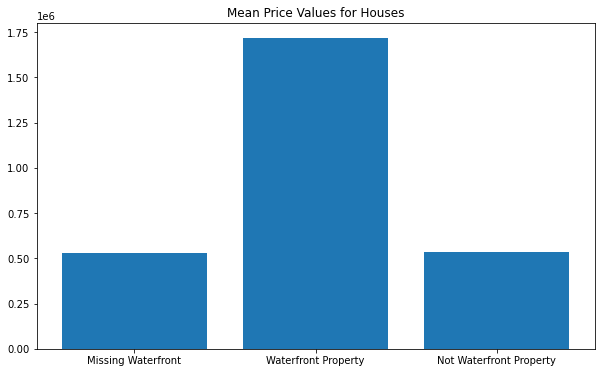

In [472]:
fig, ax = plt.subplots(figsize =(10, 6))
plt.bar(waterfront_var, waterfront_var_means)
plt.title("Mean Price Values for Houses");

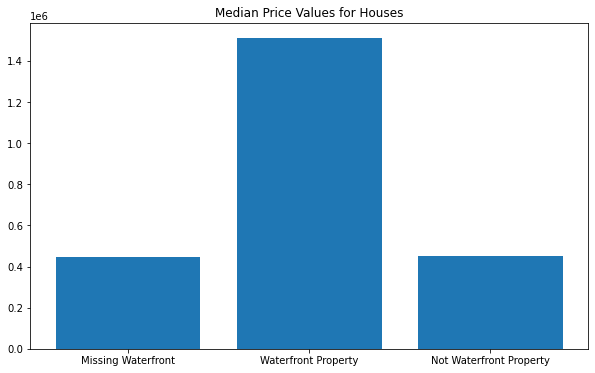

In [473]:
fig, ax = plt.subplots(figsize =(10, 6))
plt.bar(waterfront_var, waterfront_var_medians)
plt.title("Median Price Values for Houses");

The mean and median price for the missing waterfront observations is very similar to the observations for not waterfront properties. Thus, we can impute "NO" for the missing values in the waterfront column. 

In [474]:
#Impute "NO" for the "Maybe" values of the waterfront variable
housing_df["waterfront"] = housing_df["waterfront"].replace(regex=["Maybe"], value="NO")
housing_df["waterfront"].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [475]:
#Check that there is no more missing values for the waterfront variable
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


## Transforming Categorical Variables 

Now that we have dealt with missing values, we must transform our categorical variables ("waterfront", "condition", and "grade" so that we can use them in our statistical models. Without transforming them, we will not be able to include them in our model and may miss a key indicator of explaination of variation in our target variable, price.

In [476]:
#import One Hot Encoder from sci-kit learn to transform waterfront, condition, grade to dummy variables
from sklearn.preprocessing import OneHotEncoder

In [477]:
print(housing_df["waterfront"].value_counts())
print()
print(housing_df["condition"].value_counts())
print()
print(housing_df["grade"].value_counts())

NO     21451
YES      146
Name: waterfront, dtype: int64

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


In [478]:
# Create a variable condition_transf from housing_df
condition_transf = housing_df[["condition"]]

In [479]:
condition_transf.head(3)

,condition
0,Average
1,Average
2,Average


In [480]:
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

#fit encoder on condition_trasf then transform
ohe.fit(condition_transf)
condition_transf_encoded = ohe.transform(condition_transf)
condition_transf_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [481]:
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [482]:
#Use OneHotEncoder to encode the condition_transf variable
condition_transf_encoded = pd.DataFrame(
    condition_transf_encoded,
    columns=ohe.categories_[0],
    index=housing_df.index
)

condition_transf_encoded

,Average,Fair,Good,Poor,Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21592,1.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0
21594,1.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0


In [483]:
#Drop the original condition to prepare to concate the new transformed data frame with the dummy variables. 
housing_df.drop("condition", axis=1, inplace=True)
housing_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,8 Good,2004


In [484]:
#Concatenate the transformed and encoded dataframe with our original dataframe. 
housing_df = pd.concat([housing_df, condition_transf_encoded], axis=1)
housing_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,Average,Fair,Good,Poor,Very Good
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,7 Average,1955,1.0,0.0,0.0,0.0,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,7 Average,1951,1.0,0.0,0.0,0.0,0.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,6 Low Average,1933,1.0,0.0,0.0,0.0,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,7 Average,1965,0.0,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,8 Good,1987,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,8 Good,2009,1.0,0.0,0.0,0.0,0.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,8 Good,2014,1.0,0.0,0.0,0.0,0.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,7 Average,2009,1.0,0.0,0.0,0.0,0.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,8 Good,2004,1.0,0.0,0.0,0.0,0.0


In [485]:
#drop the Average column. 
#When we run the regression modeling the coefficients on "fair", "good", "poor", and "very good" will all be relative to "Average"

housing_df.drop(columns= "Average", inplace=True)
housing_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,Fair,Good,Poor,Very Good
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,7 Average,1955,0.0,0.0,0.0,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,7 Average,1951,0.0,0.0,0.0,0.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,6 Low Average,1933,0.0,0.0,0.0,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,7 Average,1965,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,8 Good,1987,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,8 Good,2009,0.0,0.0,0.0,0.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,8 Good,2014,0.0,0.0,0.0,0.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,7 Average,2009,0.0,0.0,0.0,0.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,8 Good,2004,0.0,0.0,0.0,0.0


We now transformed our "condition" variable to be four new variables that denote the condition. The coefficients on these variables will now be relative to our dropped variable - "Average". 

Finally we will transform our waterfront variable to be a binary variable where Yes = 1 and No = 0. 

In [486]:
from sklearn.preprocessing import OrdinalEncoder

waterfront_dummy_transf = housing_df[["waterfront"]]

#instantiate the OrdinalEncoder 
encoder_waterfront = OrdinalEncoder()

#Fit the encoder on waterfront_dummy_transf
encoder_waterfront.fit(waterfront_dummy_transf)

encoder_waterfront.categories_

[array(['NO', 'YES'], dtype=object)]

When we use the encoder to transform waterfront variable into 0s and 1s, 0 will mean NO and 1 will mean YES. 

In [487]:
#Transform waterfront_dummy_transf using the encoder and assingn to a new variable waterfront_encoded 
waterfront_encoded = encoder_waterfront.transform(waterfront_dummy_transf)

In [488]:
#Flatten for the correct shape.
waterfront_encoded = waterfront_encoded.flatten()

In [489]:
#Replace waterfront in the data frame with the correct values (1s, 0s)
housing_df["waterfront"] = waterfront_encoded
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,Fair,Good,Poor,Very Good
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,7 Average,1955,0.0,0.0,0.0,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,7 Average,1951,0.0,0.0,0.0,0.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,6 Low Average,1933,0.0,0.0,0.0,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,7 Average,1965,0.0,0.0,0.0,1.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,8 Good,1987,0.0,0.0,0.0,0.0


In [490]:
#Waterfront variable is now a float of 1s and 0s. Reminder that 1s denote waterfront properties. 
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  float64
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  Fair         21597 non-null  float64
 11  Good         21597 non-null  float64
 12  Poor         21597 non-null  float64
 13  Very Good    21597 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 2.3+ MB


In [491]:
#Drop variables that we are not going to use in our models due to difficulty interpreting or ambiguous context.
housing_df.drop(["id", "yr_built", "grade"], axis=1, inplace=True)

## Setting Up Train/Test Split and Dummy Regression

Before we can start modeling, we need to split our data into a training dataframe and a test dataframe. To prevent data leakage, we only fit our various models to our train dataframe. Once we determine the best model, we can apply the model to our test data to ensure that it accurately represents the effects across the dataset. 

In [493]:
#Import relevant packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor

In [494]:
X = housing_df.drop("price", axis =1)
y = housing_df["price"]

In [495]:
#Seperate the two data sets: train and test and ensure there are the same amount of observations
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 16197 rows and 10 columns
y_train is a Series with 16197 values


In [496]:
#Check that there are no missing values. 
X_train.isna().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
Fair           0
Good           0
Poor           0
Very Good      0
dtype: int64

In [497]:
#Create dummy regressor based on mean. This regressor is our "baseline" and is the most basic model. 
lr_dummy_regressor = DummyRegressor(strategy ='mean')
lr_dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [498]:
dummy_regressor_r2 = lr_dummy_regressor.score(X_train, y_train)

In [499]:
dummy_reg = DummyRegressor(strategy="mean")
lr_dummy_regressor = dummy_reg.fit(X_train, y_train)

In [500]:
y_pred = dummy_reg.predict(X_test)

#calculate root mean squared error 

mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

print("Dummy R^2:", dummy_regressor_r2)
print("Dummy RMSE:", rmse)


Dummy R^2: 0.0
Dummy RMSE: 370425.86427991075


The score denotes the R^2 for our baseline model. As you can see, it is 0, indicating that nearly 0% of our model is captured by this basic dummy regressor. This is because the dummy regressor model always predicts a constant (the mean) which does not explain variation in the independent variable. To better explain the variation in housing price by the variables in the model (and drive up our R^2) we will run various models. 

The RMSE says that on average our basic dummy model will be off by $370,425. 

## Correlation Analysis

Now that we have our cleaned dataset, we took a look at the correlations between house price and the other variables of interest to determine which variables to include in our simple linear regression model.  

In [501]:
#examine the correlations between our target variable (price) and the other variables in our cleaned dataset.
#Note that numerical values are the only ones shown in the correlation. 
housing_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,Fair,Good,Poor,Very Good
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,-0.051432,-0.030759,-0.019886,0.057531
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,-0.049463,-0.009841,-0.032520,0.027500
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.075933,-0.166756,-0.042932,-0.034765
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.063984,-0.083850,-0.033246,-0.018284
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.037871,0.013284,0.006265,-0.014452
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.055337,-0.257672,-0.023029,-0.120546
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,-0.000954,0.009785,0.012406,0.013637
Fair,-0.051432,-0.049463,-0.075933,-0.063984,0.037871,-0.055337,-0.000954,1.000000,-0.053190,-0.003266,-0.026044
Good,-0.030759,-0.009841,-0.166756,-0.083850,0.013284,-0.257672,0.009785,-0.053190,1.000000,-0.021897,-0.174605
Poor,-0.019886,-0.032520,-0.042932,-0.033246,0.006265,-0.023029,0.012406,-0.003266,-0.021897,1.000000,-0.010722


Unsuprisingly sqft_living has the highest correlation with housing price. To have a closer view of the sqft_living category to see if it fits our assumptions to run an ols regression.

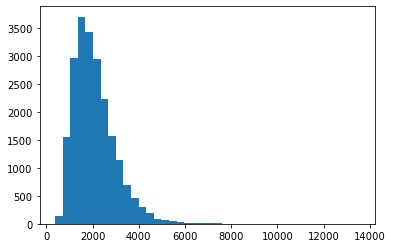

In [502]:
plt.hist(housing_df["sqft_living"], bins=40);

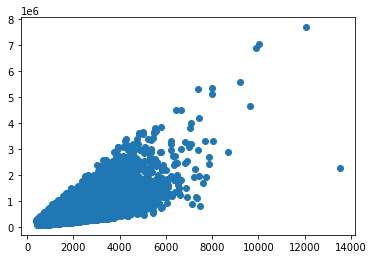

In [503]:
plt.scatter(housing_df["sqft_living"],  housing_df["price"]);

In [504]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

In [505]:
#Run basic linear regression of sqft_living on price variable
X = X_train[["sqft_living"]]
y = y_train
formula = "y ~ sqft_living"


simple_lr_1 = sm.formula.ols(formula = formula, data=X_train).fit()
simple_lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:25:40   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now that we have run a linear regression that yields statistically significant results, we need to check that our assumptions about the errors hold true. If our assumptions about the errors do not hold true, we may need to transform our model. 

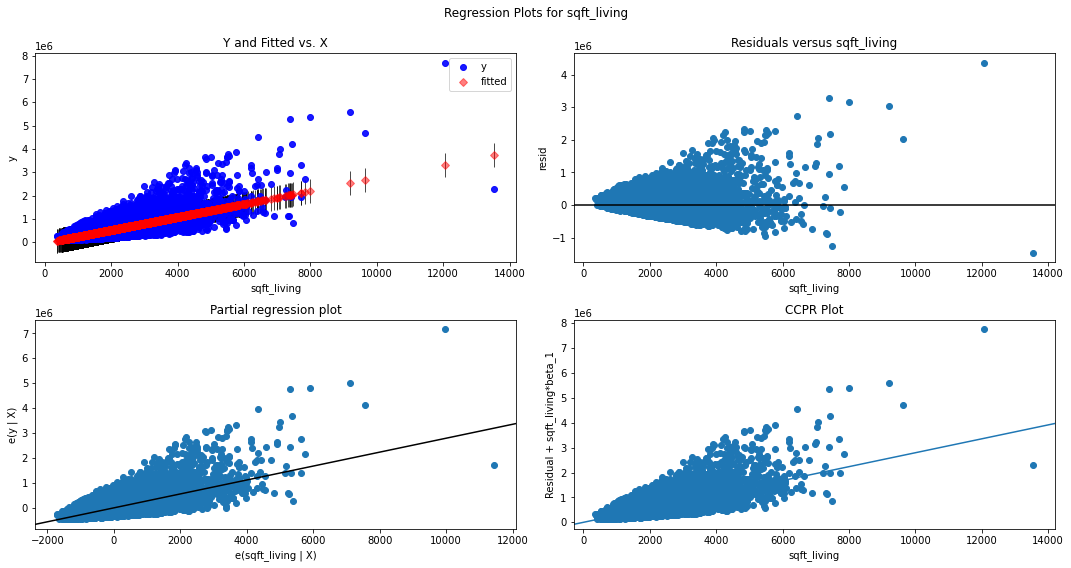

In [506]:
#Graphing errors 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(simple_lr_1, "sqft_living" , fig=fig)
plt.show()

There seems to be a heteroskedasticity problem as exemplified by the residuals versus X plot - as our sqft_living gets larger the errors also get larger. This could be due to outliers in our data. 

Because we know that the price variable does not follow a normal distribution (thus violating an assumption for linear regression in OLS), we will log(price) and see if that helps satisfy our assumptions regarding errors. 

To see if we can fix some of the problems with our errors we are going to log our price. We log the price because earlier we noticed that it may be violating our Normal Distribution assumption and thus we can correct this issue by taking the log of the variable. 

In [507]:
#Create new y_train_log variable that takes the log of y_train
y_train_log = np.log(y_train)

In [508]:
#Set up new price_log_model where X is still the sqft_living and y is the new y_train_log variable
X = X_train[["sqft_living"]]
y = y_train_log

formula = "y ~ X"


price_log_model = sm.formula.ols(formula = formula, data=X_train).fit()
price_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.514e+04
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:28:41   Log-Likelihood:                -7274.1
No. Observations:               16197   AIC:                         1.455e+04
Df Residuals:                   16195   BIC:                         1.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2179      0.007   1653.638      0.000      12.203      12.232
X              0.0004   3.24e-06    123.040      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                2.122
Skew:                           0.025   Prob(JB):                        0.346
Kurtosis:                       3.026   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

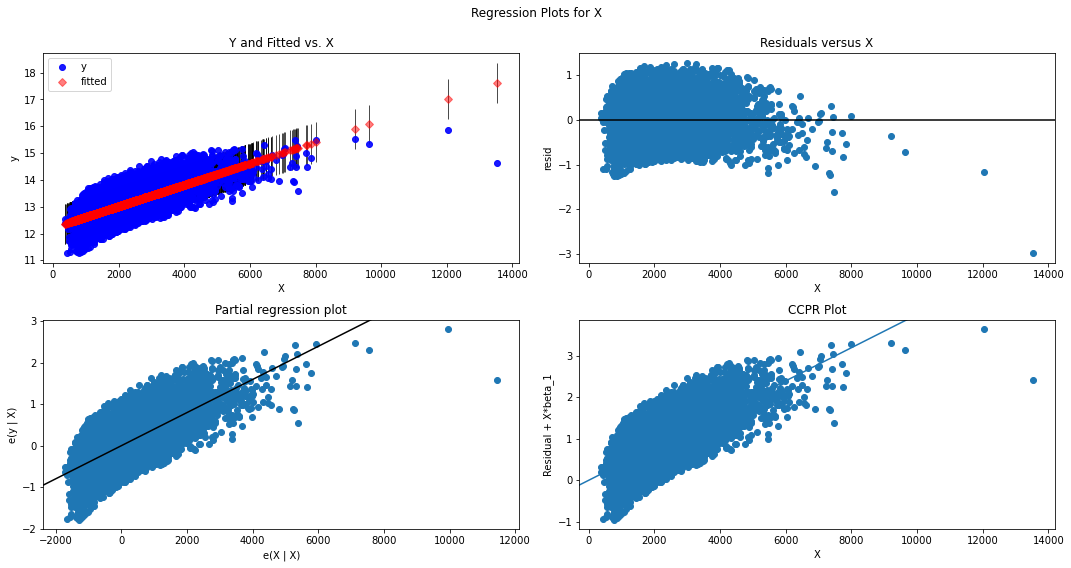

In [509]:
# plot the errors and see if they satisfy our error assumptions.
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(price_log_model, "X" , fig=fig)
plt.show()


The logged price model has improved on the error assumptions from the basic linear model. However, there still seems to be some patterns surrounding the errors at the larger sqft_living observations. We know that the sqft_living variable also did not follow a normal distribution pattern. To ammend this issue, we are going to also log the sqft_living variable to see if the errors then satisfy our assumptions. 

In [510]:
# Create new variable log_sqft_living that is the log of sqft_living
X_train["log_sqft_living"] = np.log(X_train["sqft_living"])

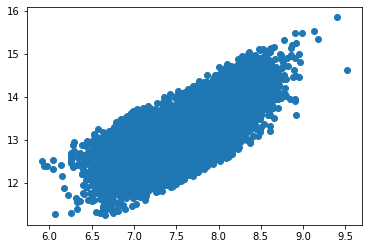

In [511]:
#Ensure that there is a linear relationship between our log_sqft_living and our log_y_train
#to satisfy linear regression assumptions. 

plt.scatter(X_train["log_sqft_living"], y_train_log);

Linear relationship between log of price and the log of sqft_living, meaning we have fulfilled OLS assumption 1 that there is a linear relationship between our variables. 

In [512]:
X_train_model_1 = X_train[["log_sqft_living"]]
y = y_train_log

formula = "y ~ log_sqft_living"


model_1 = sm.formula.ols(formula = formula, data=X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.352e+04
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:28:58   Log-Likelihood:                -7703.8
No. Observations:               16197   AIC:                         1.541e+04
Df Residuals:                   16195   BIC:                         1.543e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7168      0.055    123.128      0.000       6.610       6.824
log_sqft_living     0.8385      0.007    116.275      0.000       0.824       0.853
==============================================================================
Omnibus:                       97.981   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.075
Skew:                           0.150   Prob(JB):                     1.67e-20
Kurtosis:                       2.788   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

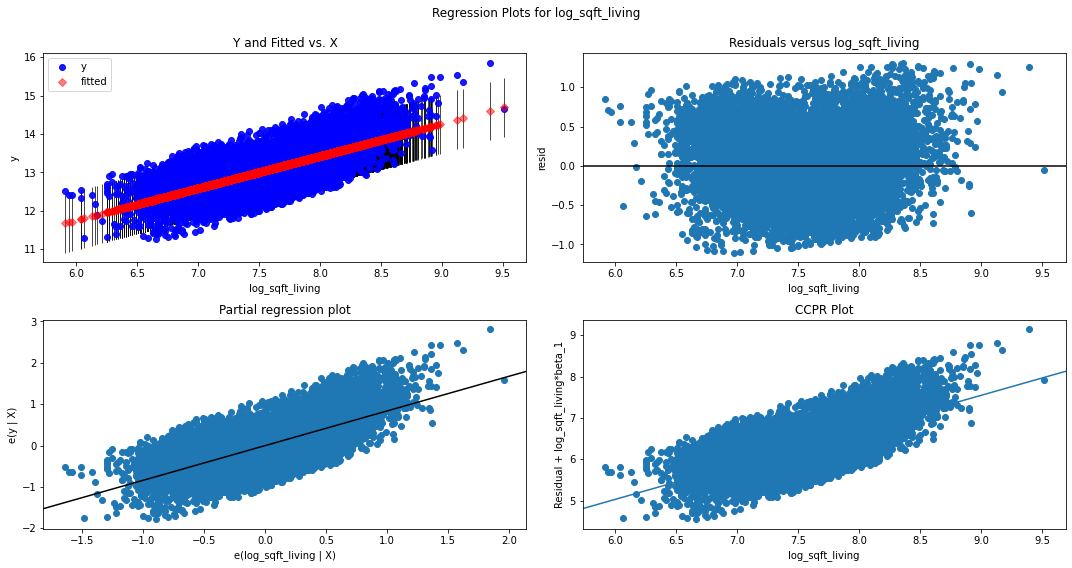

In [513]:
#plot the errors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "log_sqft_living" , fig=fig)
plt.show()


<ipython-input-514-7e9636edaaca>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


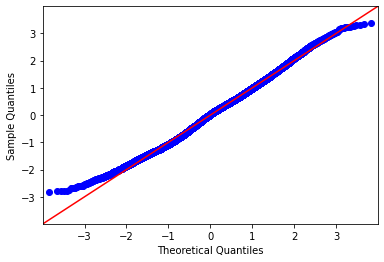

In [514]:
import scipy.stats as stats
residuals = model_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

We see that our homokedasticy reduces substantially once we logged both dependent and independent variables. 

The simple linear regression model with both price (our target variable) and sqft_living (our independent variable of interest)says that a 1% increase in square footage of a house, leads to an approx 0.83% increase in price. This is statistically significant with an alpha of 0.05 as exhibited with a p value of 0.00 and a t-stat greater than 2. 

However, our R^2 reveals that our model only explains 45.6% of the variation in price. This is relatively low, leading us to believe that a multilinear regression model may better explain fluctuations in price. 

## Multilinear Regression Analysis

## Model 2: Adding "Bedrooms" to our Model

Let's look back at our correlations to see what other variables are highly correlated with the target variable price and add that variable to our simple linear regression model. Since we are looking at log of price we see that bathrooms is highly correlated with log price. 

In [515]:
housing_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,Fair,Good,Poor,Very Good
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,-0.051432,-0.030759,-0.019886,0.057531
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,-0.049463,-0.009841,-0.032520,0.027500
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.075933,-0.166756,-0.042932,-0.034765
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.063984,-0.083850,-0.033246,-0.018284
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.037871,0.013284,0.006265,-0.014452
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.055337,-0.257672,-0.023029,-0.120546
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,-0.000954,0.009785,0.012406,0.013637
Fair,-0.051432,-0.049463,-0.075933,-0.063984,0.037871,-0.055337,-0.000954,1.000000,-0.053190,-0.003266,-0.026044
Good,-0.030759,-0.009841,-0.166756,-0.083850,0.013284,-0.257672,0.009785,-0.053190,1.000000,-0.021897,-0.174605
Poor,-0.019886,-0.032520,-0.042932,-0.033246,0.006265,-0.023029,0.012406,-0.003266,-0.021897,1.000000,-0.010722


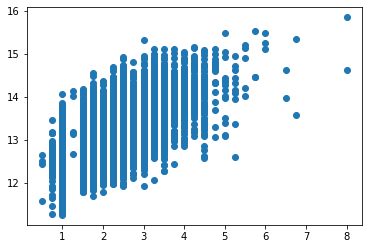

In [516]:
plt.scatter(X_train["bathrooms"], y_train_log);

(array([2.935e+03, 3.398e+03, 6.999e+03, 1.891e+03, 7.700e+02, 1.630e+02,
        2.900e+01, 6.000e+00, 4.000e+00, 2.000e+00]),
 array([0.5 , 1.25, 2.  , 2.75, 3.5 , 4.25, 5.  , 5.75, 6.5 , 7.25, 8.  ]),
 <BarContainer object of 10 artists>)

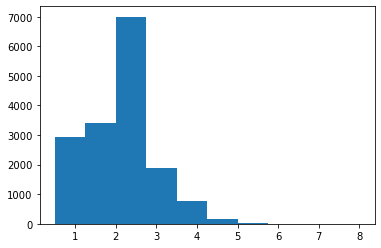

In [517]:
plt.hist(X_train["bathrooms"])

In [518]:
#Model 2 
X_train_model_2 = X_train[["log_sqft_living", "bathrooms"]]
y = y_train_log

formula = "y ~ log_sqft_living + bathrooms"


model_2 = sm.formula.ols(formula = formula, data=X_train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     6854.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:29:58   Log-Likelihood:                -7652.4
No. Observations:               16197   AIC:                         1.531e+04
Df Residuals:                   16194   BIC:                         1.533e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.2400      0.075     96.638      0.000       7.093       7.387
log_sqft_living     0.7517      0.011     67.279      0.000       0.730       0.774
bathrooms           0.0627      0.006     10.153      0.000       0.051       0.075
==============================================================================
Omnibus:                      110.597   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.114
Skew:                           0.158   Prob(JB):                     6.70e-23
Kurtosis:                       2.774   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [519]:
#Find the Root Mean Squared Error to see how this model compares to our base model (dummy regression)
np.sqrt(mean_squared_error(y_true=y_train, y_pred = np.exp(model_2.predict(X_train_model_2))))

275695.29603814374

The R^2 of Model 2 tells us that our model explains 45.8% of the variation in price. The RMSE tells us that our Model 2 predicts prices that are on average approx. $275,695 off the actual price. While this is high, it is lower than our dummy model. 

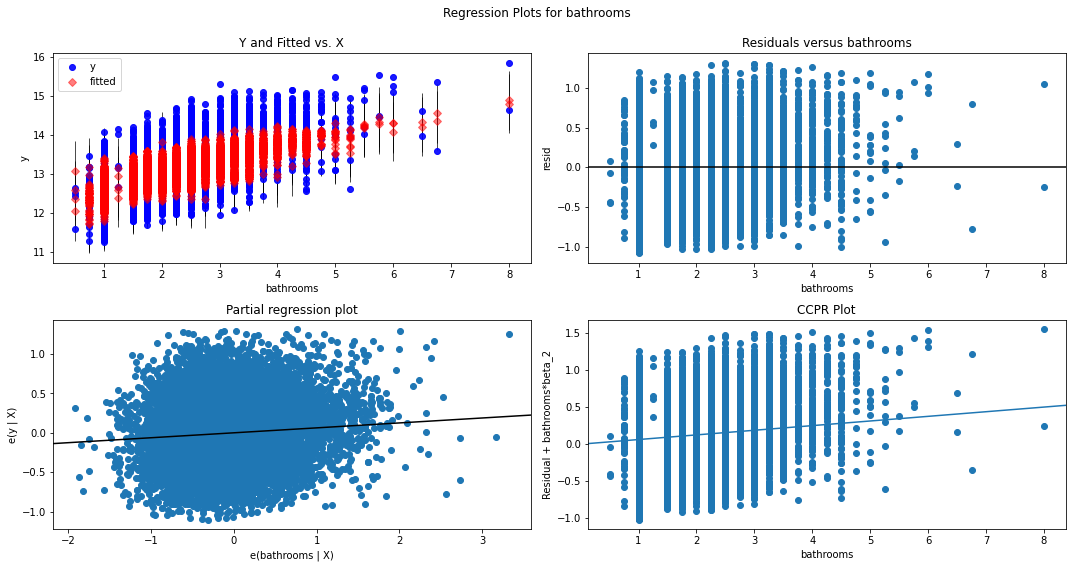

In [520]:
#Check that our regression model fulfills assumptions regarding the errors. 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_2, "bathrooms" , fig=fig)
plt.show()

We see from the plots that the residuals mostly fulfill our assumptions, however there is still a bit of noise in the higher levels. 

Because we want to see the effect of both bathrooms and housing square footage on housing price, which have very different units of measurement, we standardized the variables. Standardization shows us how many standard deviations from the mean each observation is. In an OLS regression model, coefficients on standardized variables tells us the effect (in standard deviations) on the dependent variable of increasing the independent variable by one standard deviation. For example, in this data set, after standardizing both bathrooms and price the coefficent on bathrooms tells us the increase of one standard deviation of bathrooms is associated with an incease/decrease of the coefficient on bathrooms standard deviations in price. 

The formula for standardization is X_Standardized = (X - Mu)/(std_X). 

As a note - because we are using our logged variables to adjust to normality assumption, we are scalling our logged variables. This will make our coefficients a bit more difficult to intuitively understand. 

In [521]:
#scaling our coefficients using Sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
X_train["scaled_sqft_living"] = (X_train["log_sqft_living"] - np.mean(X_train["log_sqft_living"])/ np.sqrt(np.var(X_train["log_sqft_living"])))
X_train["scaled_bathrooms"] = (X_train["bathrooms"] - np.mean(X_train["bathrooms"]) / np.sqrt(np.var(X_train["bathrooms"])))

In [522]:
#Check to see that the dataframe has the new scaled columns
X_train.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,Fair,Good,Poor,Very Good,log_sqft_living,scaled_sqft_living,scaled_bathrooms
6405,3,2.50,1880,4499,2.0,0.0,0.0,0.0,0.0,0.0,7.539027,-10.263642,-0.255672
937,3,2.50,2020,6564,1.0,0.0,0.0,0.0,0.0,0.0,7.610853,-10.191817,-0.255672
19076,5,4.00,4720,493534,2.0,0.0,0.0,0.0,0.0,1.0,8.459564,-9.343105,1.244328
15201,2,2.00,1430,3880,1.0,0.0,0.0,1.0,0.0,0.0,7.265430,-10.537240,-0.755672
13083,3,2.25,2270,32112,1.0,0.0,0.0,1.0,0.0,0.0,7.727535,-10.075134,-0.505672
16852,1,1.50,1048,4800,1.0,0.0,0.0,0.0,0.0,0.0,6.954639,-10.848031,-1.255672
8147,3,1.75,1820,78408,1.0,0.0,0.0,0.0,0.0,0.0,7.506592,-10.296078,-1.005672
5662,4,2.50,4280,12796,2.0,0.0,0.0,0.0,0.0,0.0,8.361708,-9.440961,-0.255672
2134,4,2.25,3040,5000,2.0,0.0,0.0,1.0,0.0,0.0,8.019613,-9.783057,-0.505672
4965,3,2.50,1740,1279,3.0,0.0,0.0,0.0,0.0,0.0,7.461640,-10.341029,-0.255672


In [523]:
#Running ols using the scaled variables. 
X = X_train[["scaled_sqft_living", "scaled_bathrooms"]]
y = y_train_log
formula3 = "y ~ scaled_sqft_living + scaled_bathrooms"



In [524]:
model_2_scaled = sm.formula.ols(formula = formula3, data=X_train).fit()
model_2_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     6854.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:32:52   Log-Likelihood:                -7652.4
No. Observations:               16197   AIC:                         1.531e+04
Df Residuals:                   16194   BIC:                         1.533e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.7950      0.112    186.374      0.000      20.576      21.014
scaled_sqft_living     0.7517      0.011     67.279      0.000       0.730       0.774
scaled_bathrooms       0.0627      0.006     10.153      0.000       0.051       0.075
==============================================================================
Omnibus:                      110.597   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.114
Skew:                           0.158   Prob(JB):                     6.70e-23
Kurtosis:                       2.774   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Once we scaled the variables in our linear regression model, we are able to determine which feature in our model has a greater impact (in standardized form) on our logged price variable. We see that the square feet of living area of a house has a greater impact than the number of bathrooms. 

Our Adjusted R^2 has also slightly improved from the basic model of log price and log sqft_living. However, this model only captures 46% of the variation in price. 

## Model 3: Adding in the Waterfront Variable

From our correlation matrix, we see that the Waterfront variable also has a higher correlation with price than other variables in our dataset. We will add the waterfront variable to our regression and see if it improves R^2. 

As a note, the waterfront variable is a categorical variable where 1 = Waterfront Property and 0 = Non Waterfront Variable. Thus the coefficient from our regression captures the effect of Waterfront Property on Logged Price relative to non-waterfront properties. 

In [525]:
X_train_model_3 = X_train[["log_sqft_living", "bathrooms", "waterfront"]]
y = y_train_log

In [526]:
formula = "y ~ log_sqft_living + bathrooms + waterfront"

In [527]:
model_3 = sm.formula.ols(formula = formula, data=X_train).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4851.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:34:23   Log-Likelihood:                -7426.4
No. Observations:               16197   AIC:                         1.486e+04
Df Residuals:                   16193   BIC:                         1.489e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3233      0.074     98.983      0.000       7.178       7.468
log_sqft_living     0.7402      0.011     67.099      0.000       0.719       0.762
bathrooms           0.0618      0.006     10.154      0.000       0.050       0.074
waterfront          0.7831      0.037     21.405      0.000       0.711       0.855
==============================================================================
Omnibus:                      105.370   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.874
Skew:                           0.117   Prob(JB):                     8.29e-20
Kurtosis:                       2.725   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [528]:
#Scaling waterfront variable 
X_train["scaled_waterfront"] = (X_train["waterfront"] - np.mean(X_train["waterfront"]) / np.sqrt(np.var(X_train["waterfront"])))

In [529]:
X = X_train[["scaled_sqft_living", "scaled_bathrooms", "scaled_waterfront"]]
y = y_train_log
formula4 = "y ~ scaled_sqft_living + scaled_bathrooms + scaled_waterfront"

model_3_scaled = sm.formula.ols(formula = formula4, data=X_train).fit()
model_3_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4851.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:34:28   Log-Likelihood:                -7426.4
No. Observations:               16197   AIC:                         1.486e+04
Df Residuals:                   16193   BIC:                         1.489e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.7363      0.110    188.395      0.000      20.521      20.952
scaled_sqft_living     0.7402      0.011     67.099      0.000       0.719       0.762
scaled_bathrooms       0.0618      0.006     10.154      0.000       0.050       0.074
scaled_waterfront      0.7831      0.037     21.405      0.000       0.711       0.855
==============================================================================
Omnibus:                      105.370   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.874
Skew:                           0.117   Prob(JB):                     8.29e-20
Kurtosis:                       2.725   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The scaled model 3 results show us that waterfront now has the largest effect on logged price than the other variables. Our non-scaled regression results tell us that waterfront properties on average have prices 78% higher than non-waterfront properties, holding all else constant. 

Our Adjusted R^2 has also improved. 

## Model 4: Adding Conditions Variables

Conditions were also correlated with our target variable, price. This makes sense that the condition that a house is in will help explain variation in price. As a reminder, our transformation of this categorical feature means that the coefficients on these condition variables are the change in price relative to the left out condition variable, "average".

In [532]:
X_train_model_4 = X_train[["log_sqft_living", "bathrooms", "waterfront", "Fair", "Good", "Poor", "Very Good"]]
y = y_train_log

model_4 = sm.OLS(y_train_log, sm.add_constant(X_train_model_4)).fit()

In [533]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2144.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:37:04   Log-Likelihood:                -7306.4
No. Observations:               16197   AIC:                         1.463e+04
Df Residuals:                   16189   BIC:                         1.469e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.3545      0.074     99.983      0.000       7.210       7.499
log_sqft_living     0.7310      0.011     66.497      0.000       0.709       0.753
bathrooms           0.0695      0.006     11.308      0.000       0.057       0.082
waterfront          0.7696      0.036     21.179      0.000       0.698       0.841
Fair               -0.1553      0.034     -4.592      0.000      -0.222      -0.089
Good                0.0409      0.007      5.788      0.000       0.027       0.055
Poor               -0.2072      0.090     -2.309      0.021      -0.383      -0.031
Very Good           0.1573      0.011     13.981      0.000       0.135       0.179
==============================================================================
Omnibus:                       95.873   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.407
Skew:                           0.115   Prob(JB):                     2.10e-18
Kurtosis:                       2.740   Cond. No.                         238.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the condition variables all have statistically significant impact on price as exhibited by low P-values (lower than our threshold of 0.05). An as expected the variables that indicate worse condition than average, "fair" and "poor" decrease the price relative to houses in average condition, holding all else equal. Likewise, the variables that indicate better conditions than average "good" and "very good" increase the sale price of the house relative to average, holding all else equal. 

We also notice that our Adjusted R^2 has improved again - suggesting that including these variables have helped increase the variation in price that is explained by our model. 

## Model 5: Adding Square Feet Living per Bedroom

One would think that the amount of living area per bedroom in a house is indicative of price. For example, a house with 3 bedrooms, but small living area is expected to be cheaper than a house with 3 bedrooms and a large living area, holding all else equal. Creating a ratio of living area to bedroom count would help account for this in our model. 


In [534]:
#Create new variable living_area_per_bedroom
X_train["living_area_per_bedroom"] = X_train["sqft_living"] / X_train ["bedrooms"]

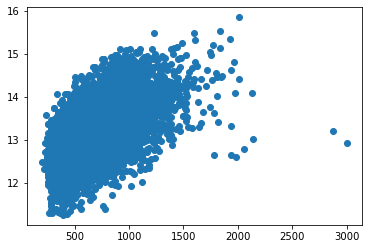

In [536]:
#plot to see if there is a linear relationship between living_area_per_bedroom and target of log_price
plt.scatter(X_train["living_area_per_bedroom"], y_train_log);

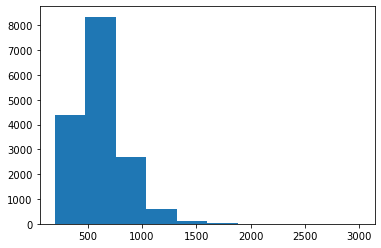

In [537]:
plt.hist(X_train["living_area_per_bedroom"]);

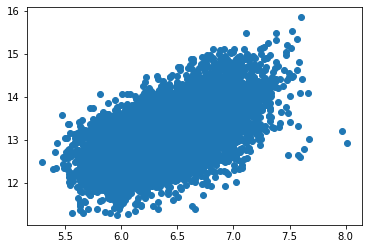

In [538]:
# log the new variable to account for living area per bedroom not having a normal distribution.
X_train["log_living_area_per_bedroom"] = np.log(X_train["living_area_per_bedroom"])
plt.scatter(X_train["log_living_area_per_bedroom"], y_train_log)

In [539]:
#Run regression with the new logged variable. Note: we remove log living area because it will be highly correlated
#with the new variable. 

X_train_model_5 = X_train[["log_sqft_living", "bathrooms", "waterfront", "Fair", "Good", "Poor", "Very Good", "log_living_area_per_bedroom"]]
y = y_train_log

model_5 = sm.OLS(y_train_log, sm.add_constant(X_train_model_5)).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2000.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:43:18   Log-Likelihood:                -7053.2
No. Observations:               16197   AIC:                         1.412e+04
Df Residuals:                   16188   BIC:                         1.419e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.7708      0.077     88.094      0.000       6.620       6.921
log_sqft_living                 0.5423      0.014     39.708      0.000       0.515       0.569
bathrooms                       0.0800      0.006     13.177      0.000       0.068       0.092
waterfront                      0.7071      0.036     19.706      0.000       0.637       0.777
Fair                           -0.1509      0.033     -4.532      0.000      -0.216      -0.086
Good                            0.0523      0.007      7.507      0.000       0.039       0.066
Poor                           -0.2485      0.088     -2.812      0.005      -0.422      -0.075
Very Good                       0.1714      0.011     15.450      0.000       0.150       0.193
log_living_area_per_bedroom     0.3112      0.014     22.672      0.000       0.284       0.338
==============================================================================
Omnibus:                       77.452   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.351
Skew:                           0.117   Prob(JB):                     8.72e-16
Kurtosis:                       2.781   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From our fifth, and final model, we see that adding the log of living area per bedroom variable has increased our R^2, showing that 49.7% of the variation in our target variable (log price) is explained by this model, up from 48.1% in the model that excludes the variable. We also see that the effect of log living area per bedroom on log price is statistically significant at the 95% confidence level. The coefficient on this new variable reveals that a 1% increase in square foot living area per bedroom leads to a 0.331% increase in price, holding all else constant. 

In [540]:
ss = StandardScaler().fit(X_train_model_5)
X_train_model_5_scaled = ss.transform(X_train_model_5)
model_5_scaled = sm.OLS(y_train_log, sm.add_constant(X_train_model_5_scaled)).fit()
model_5_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2000.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:43:22   Log-Likelihood:                -7053.2
No. Observations:               16197   AIC:                         1.412e+04
Df Residuals:                   16188   BIC:                         1.419e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0498      0.003   4439.319      0.000      13.044      13.056
x1             0.2300      0.006     39.708      0.000       0.219       0.241
x2             0.0615      0.005     13.177      0.000       0.052       0.071
x3             0.0583      0.003     19.706      0.000       0.053       0.064
x4            -0.0134      0.003     -4.532      0.000      -0.019      -0.008
x5             0.0230      0.003      7.507      0.000       0.017       0.029
x6            -0.0083      0.003     -2.812      0.005      -0.014      -0.003
x7             0.0464      0.003     15.450      0.000       0.040       0.052
x8             0.1005      0.004     22.672      0.000       0.092       0.109
==============================================================================
Omnibus:                       77.452   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.351
Skew:                           0.117   Prob(JB):                     8.72e-16
Kurtosis:                       2.781   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

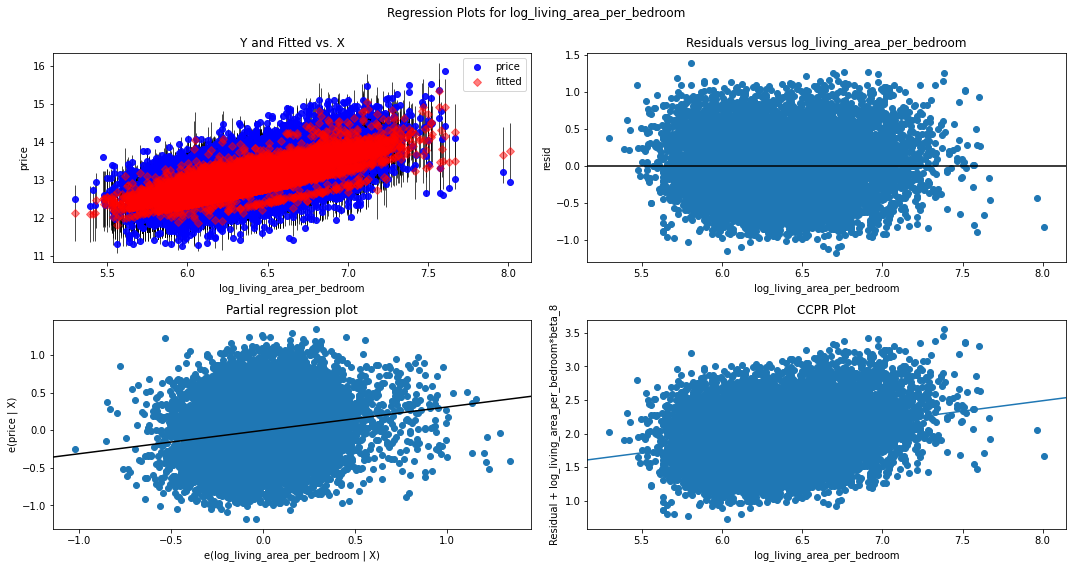

In [542]:
#plot the errors against our new "log_living_area_per_bedroom" to see if they follow our assumptions. 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_5, "log_living_area_per_bedroom" , fig=fig)
plt.show()

From the scaled model we can infer that the square foot living area of a house (x1), the squaret foot living area per bedroom, number of bathrooms, and whether or not the house was on the waterfront have the highest impact on the logged price of the house. Another strong indicator from our model is whether the house is in "Very Good" condition or not. 

## Cross Validating Our Models 

In order to determine which model best fits our overall dataset, we need to choose which model best fits our training data set. We can then use this model on our test data set to see if the model similar fits the test data. To do so, we need to cross validate each of the models and get cross validation scores. 

In [544]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

linreg = LinearRegression()
mse = make_scorer(mean_squared_error)

In [545]:
model_1_cv_score = np.mean(cross_val_score(linreg, X_train_model_1, y_train_log, cv=5))
model_1_cv_score

0.4543074986356473

In [546]:
model_2_cv_scores = cross_val_score(linreg, X_train_model_2, y_train_log, cv =5, scoring="neg_mean_squared_log_error")
model_2_cv_score_mean = model_2_cv_scores.mean()
model_2_cv_score_mean

-0.0007625114697602676

In [547]:
model_3_cv_scores = cross_val_score(linreg, X_train_model_3, y_train_log, cv =5, scoring=mse)
model_3_cv_score_mean = model_3_cv_scores.mean()
model_3_cv_score_mean

0.14657850404960984

In [548]:
model_4_cv_scores = cross_val_score(linreg, X_train_model_4, y_train_log, cv =5, scoring=mse)
model_4_cv_score_mean = model_4_cv_scores.mean()
model_4_cv_score_mean

0.14452116610576976

In [549]:
model_5_cv_scores = cross_val_score(linreg, X_train_model_5, y_train_log, cv =5, scoring=mse)
model_5_cv_score_mean = model_5_cv_scores.mean()
model_5_cv_score_mean

0.1401568143332552

In [550]:
model_1_scores = cross_validate(
    estimator=linreg,
    X=X_train_model_1,
    y=y_train_log,
    return_train_score=True,
    cv=5
)
print("Train score:     ", model_1_scores["train_score"].mean())
print("Validation score:", model_1_scores["test_score"].mean())
print()

Train score:      0.4549960973375269
Validation score: 0.4543074986356473



In [551]:
model_2_scores = cross_validate(
    estimator=linreg,
    X=X_train_model_2,
    y=y_train_log,
    return_train_score=True,
    cv=5
)
print("Train score:     ", model_2_scores["train_score"].mean())
print("Validation score:", model_2_scores["test_score"].mean())
print()

Train score:      0.4584524654854321
Validation score: 0.4576617034858218



In [552]:
model_3_scores = cross_validate(
    estimator=linreg,
    X=X_train_model_3,
    y=y_train_log,
    return_train_score=True,
    cv=5
)
print("Train score:     ", model_3_scores["train_score"].mean())
print("Validation score:", model_3_scores["test_score"].mean())
print()

Train score:      0.47335435483093935
Validation score: 0.47261778434387536



In [553]:
model_4_scores = cross_validate(
    estimator=linreg,
    X=X_train_model_4,
    y=y_train_log,
    return_train_score=True,
    cv=5
)
print("Train score:     ", model_4_scores["train_score"].mean())
print("Validation score:", model_4_scores["test_score"].mean())
print()

Train score:      0.48114022943022955
Validation score: 0.47999495916266144



In [554]:
model_5_scores = cross_validate(
    estimator=linreg,
    X=X_train_model_5,
    y=y_train_log,
    return_train_score=True,
    cv=5
)
print("Train score:     ", model_5_scores["train_score"].mean())
print("Validation score:", model_5_scores["test_score"].mean())
print()

Train score:      0.49714344928341003
Validation score: 0.4957310787300675



From the cross validation scores we see that our final model, which includes the new square footage per bedroom variable, has the highest validation score and thus fits our training data the best. Now, we need to fit to our test data to ensure that the model is not too biased to our training data. 

## Best Fit Model: Model 5

In [555]:
#Transforming the test data to match our train data

#Create the log_sqft_living
X_test["log_sqft_living"] = np.log(X_test["sqft_living"])

#Create the log_living_area_per_bedroom variable on X_test
X_test["living_area_per_bedroom"] = X_test["sqft_living"] / X_test ["bedrooms"]
X_test["log_living_area_per_bedroom"] = np.log(X_test["living_area_per_bedroom"])


In [556]:
X_test_model_5 = X_test[["log_sqft_living", "bathrooms", "waterfront", "Fair", "Good", "Poor", "Very Good", "log_living_area_per_bedroom"]]


In [557]:
X_train_final = X_train_model_5
X_test_final = X_test_model_5

In [558]:
best_fit_model = LinearRegression()

#Fit the best fit model on the X_train_model_5 and y_train_log
best_fit_model.fit(X_train_model_5, y_train_log)

#Score the model on X test final and y_test
best_fit_model.score(X_test_final, y_test)


-2.1043269566180043

In [559]:
best_fit_model.score(X_test_final, np.log(y_test))

0.48960189280192035

In [560]:
y_pred=np.exp(best_fit_model.predict(X_test_final))

In [561]:
r2_score(y_true = y_test, y_pred=np.exp(best_fit_model.predict(X_test_final)))

0.5334917015385731

In [562]:
RMSE_model_5 = mean_squared_error(y_test, np.exp(best_fit_model.predict(X_test_final)), squared=False)
RMSE_model_5

252991.70637497926

The Root Mean Squared Error shows that our model is, on average, $252,991 off the price of a house.
While this is still quite high, it is less than the dummy model, and thus better predicts our house prices. 

When we take the final model as our pricing model we determine the following factors must be taken into account when pricing homes. 

    - Waterfront properties are on average 70.7 percent more expensive than non waterfront properties, holding all else equal. This is statistically significant at the 95 percent confidence level. 
    
    - 1 percent increase in square footage of a house on average increases the price of a house by approx. 0.54 percent, holding all else constant. Said another way, a 10 percent incrase in square footage of a houses the price of a house by approx. 5.4 percent, holding all eles constant.  

## Visualizing Our Final Model

Now that we have determined our model of best fit, it is helpful to look at how the variables of interest in our final model effect the housing prices. 

First, we will look at the square footage and housing price since this variable had the largest impact on housing prices in our final model. 

In [563]:
#import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

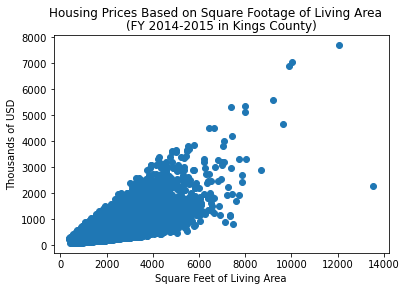

In [573]:
plt.scatter(x=housing_df["sqft_living"], y=(housing_df["price"]/1000))
plt.suptitle("Housing Prices Based on Square Footage of Living Area")
plt.title("(FY 2014-2015 in Kings County)")
plt.ylabel("Thousands of USD")
plt.xlabel("Square Feet of Living Area")
plt.savefig("housing_price_sq_ft");

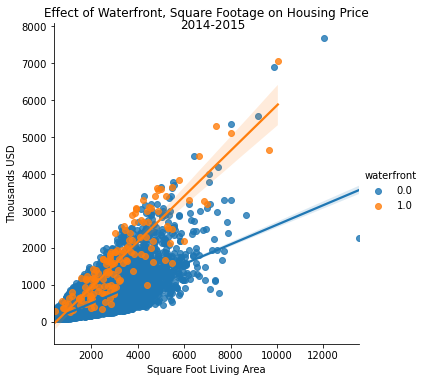

In [575]:
#Scale price target variable to better read axis
housing_df["price_thousands"] = housing_df["price"] / 1000 

#Plot squareft against sale price with different best fit lines for waterfront
sns.lmplot(x="sqft_living", y="price_thousands", hue="waterfront", data=housing_df, legend_out=True)
plt.title("Effect of Waterfront, Square Footage on Housing Price")
plt.suptitle("2014-2015")
plt.xlabel("Square Foot Living Area")
plt.ylabel("Thousands USD")
plt.savefig("waterfront_sqft_scatter");

This graph further justifies our use of waterfront variable in the regression model. 

Plotting Waterfront Mean Values



In [576]:
waterfront_prop_price_mean = housing_df["price"][housing_df["waterfront"]  == 1].mean()
not_waterfront_prop_price_mean = housing_df["price"][housing_df["waterfront"]  == 0].mean()
waterfront_prop_price_mean

1717214.7260273972

In [577]:
waterfront_list = ["Waterfront Property", "Non-Waterfront Property"]
waterfront_list_means = [waterfront_prop_price_mean/1000, not_waterfront_prop_price_mean/1000]

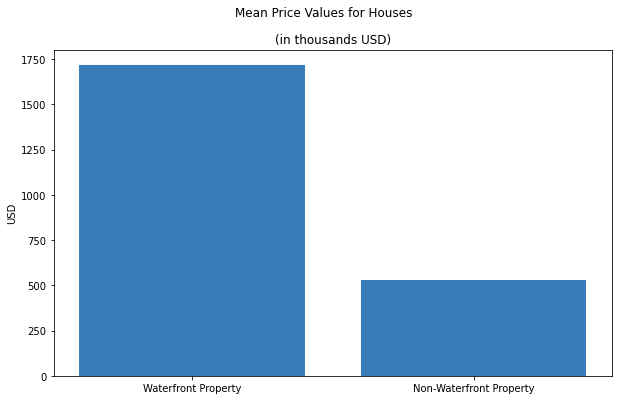

In [578]:
fig, ax = plt.subplots(figsize =(10, 6))
plt.bar(waterfront_list, waterfront_list_means, color = "#377eb8")
plt.suptitle("Mean Price Values for Houses")
plt.title("(in thousands USD)")
plt.ylabel("USD");
plt.savefig("mean_price_values_houses_bar")

In [579]:
waterfront_prop_price_mean

1717214.7260273972

In [580]:
not_waterfront_prop_price_mean

532286.2219943126

In [581]:
t_value,p_value=stats.ttest_ind(housing_df["price"][housing_df["waterfront"]  == 1], housing_df["price"][housing_df["waterfront"]  == 0])
t_value, p_value

(40.27257651101429, 0.0)

Statistically significant T value says that the mean price of house sales for waterfront property is statistically significant different from nonwaterfront values.

Plotting square footage per bedroom versus square footage living area. 

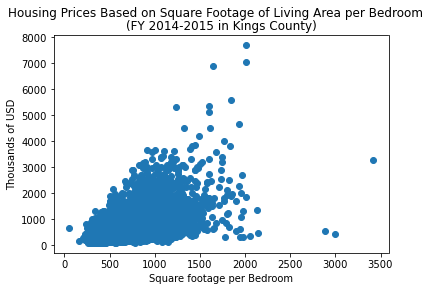

In [582]:
housing_df["sqft_living_per_bedroom"] = housing_df["sqft_living"] / housing_df["bedrooms"]

plt.scatter(housing_df["sqft_living_per_bedroom"], housing_df["price"]/1000)
plt.suptitle("Housing Prices Based on Square Footage of Living Area per Bedroom")
plt.title("(FY 2014-2015 in Kings County)")
plt.ylabel("Thousands of USD")
plt.xlabel("Square footage per Bedroom")
plt.savefig("sq_ft_per_bed");

In [583]:
from scipy.stats import pearsonr
pearsonr(X_train["living_area_per_bedroom"], y_train)

(0.5734212604753525, 0.0)

Pearson coefficient shows the correlation of the values. High correlation relative to our other variables. 

Visulizing our predicted values for price versus our actual values for price. 

<function matplotlib.pyplot.legend(*args, **kwargs)>

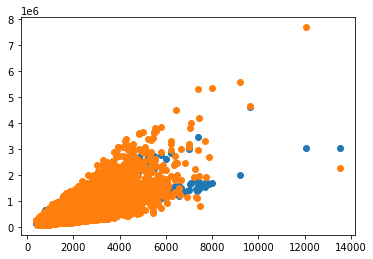

In [407]:
y_predicted = np.exp(best_fit_model.predict(X_train_final))
y_actual = y_train                     

                     
plt.scatter(X_train["sqft_living"], y_predicted)
plt.scatter(X_train["sqft_living"], y_actual)
plt.legend

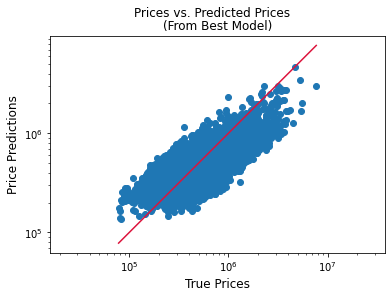

In [430]:
#Plotting the actual prices vs. predicted prices with line at perfect prediction (x=y)
#logged because scale 
plt.scatter(y_actual, y_predicted)
plt.yscale('log')
plt.xscale('log')
plt.plot([p1, p2], [p1, p2], 'b-', c= "crimson")
plt.xlabel('True Prices', fontsize=12)
plt.ylabel('Price Predictions', fontsize=12)
plt.axis('equal')
plt.suptitle("Prices vs. Predicted Prices")
plt.title("(From Best Model)")
plt.savefig("prices_predicted")


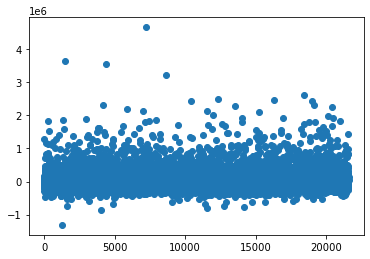

In [429]:
#Plotting the residuals. A perfect model would have residuals clustered around 0. 
plt.plot(y_actual - y_predicted, marker='o',linestyle='')
plt.savefig("residual_graph")

Plotting our true price values against our prediction prices reveals how our model fits the data. You would want your data to be as closely fitted to the line as possible - and this shows that it is clustered but some variation. The deviation from the line shows that we are in some cases overestimating our predictions and sometimes underestimating our predictions. 

The plotting of the residuals shows that in some cases we have high errors (price actual - price predicted). This plot is degree of errors plotted against the observations (X axis). 

## Pricing Strategy Recommendations

Through our iterative process we were able to find a model that better explained the variation in house sales price in King's County, Washington as exemplified by our increasing Adjusted R^2 and lower RMSE than the base model of a simple linear regression of square foot of living area on house sale prices. 

However, there are significant limitations to our model and anyone who plans to use the model as a pricing strategy should be aware of these. 

First, the overall R^2 of our best fit model is still low - only explaining 50% of the variation in house price. Ideally, we could incorporate other data including geolocation data (the zipcode variable) to help explain variation in price. We expect this variable would drive up the R^2. 

Second, we know there are multicollinearty problems in the model, particularly between the sqft_living and living_area_per_bedroom variables. This makes sense as there is a relationship between the size of the living area of a house and the ratio of living area to bedroom. 

Finally, while we were able to lower the Root Mean Squared Error from the base model, in real terms it is still quite high. Our predictions are off by almost $250,000. When the mean house sale price of the data set is $540,296 this can be quite a big difference. 

We recommend further analysis on other variables in order to improve on our best model, including using geolocation. We also recommend parsing out higher valued & larger homes to see if stratisfying our dataset in this way could better explain variations in price as these observations tended to be outliers in our data. 